In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

# local imports
%load_ext autoreload
%autoreload 2
from segmentation_models import cGAN_nuclei
from image_utils import find_blobs, draw_keypoints

model = cGAN_nuclei()

dataset [SingleImageDataset] was created
initialize network with normal
model [TestModel] was created
loading the model from ../NucleiSegmentation/checkpoints/NU_SEG/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


(1040, 1388, 3)

dtype('uint8')

<IPython.core.display.Javascript object>


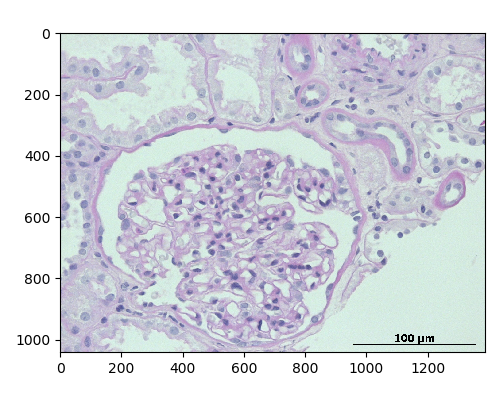

In [2]:
img = cv2.imread('./PAS.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

display(img.shape, img.dtype)

fig, ax = plt.subplots(figsize=(5, 4), tight_layout=True)
ax.imshow(img);

7 celulas detectadas en la imagen


<IPython.core.display.Javascript object>


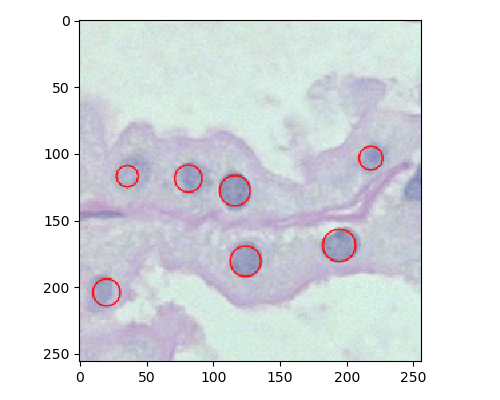

In [3]:
sub_img = img[:256, :256]

contour_mask = model.get_contours(sub_img)
cv_keypoints = find_blobs(contour_mask)
print(f'{len(cv_keypoints)} celulas detectadas en la imagen')


fig, ax = plt.subplots(figsize=(5, 4), tight_layout=True)
ax.imshow(draw_keypoints(sub_img, cv_keypoints))